# 仮説検定

## 統計的仮設検定の基本的な考え方

統計の仮説検定ではある仮説（例：2グループが同じ母集団から得られたものかどうか）が真であるかどうかを客観的に判断できようにする手段です。

```{note}
1. 仮設の設定
    - 主張したい仮説ではなくてその主張を否定する **帰無仮説(H0)** を設定します。
    -　例えば、「サンプルの集合の間に違いはない」というものです。 **対立仮説(H1)** は、標本間に差があるというものです。
    - 帰無仮説を **棄却** できるかどうかを確認することで対立仮説を採用するかどうかを判断します。

2. 帰無仮説が正しいとういう前提で得られた標本が実現する確率を計算する（真偽を検証するための統計量を決め、 統計量を計算する）

3. 帰無仮説のもとで観測されたデータが実現する確率（有意性のための基準値（p値）、たとえば5%）が低い場合は、まれにしか起こり得ないことが起こったと考え帰無仮説が正しくないと判断して（帰無仮説を棄却）、対立仮説を採用します。
```

````{note}
帰無仮説と対立仮説

対立仮説を採用する前に、強力な証拠が必要であるという懐疑論的な立場に立ちます。

* 帰無仮説は懐疑的な視点、あるいは検証すべき主張を表すことが多いです。または「差がない」という視点を表します。
* 対立仮説は検討中の主張を表します。
    
```{note}
なぜ二重否定なのでしょうか？
* 多くの統計学的な説明では二重否定が使われます。例えば、帰無仮説を棄却できなかったという表現などです。
* 二重否定はある見方を否定しない一方で、正しいとも言わないことを伝えるために使用されます。
```

````

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
%matplotlib inline

### 燃費はオートマ車とマニュアル車で差があるのか？

2つのグループ間の差異を検定します。
例えば、あるツールを使っているグループの方が使っていないグループよりも作業効率が良いかどうか、ある医療行為を受けた患者グループは対象グループよりも良い結果が得られたかどうかなどを確認することができます。

ここでは自動車のデザインや性能に関連して燃費がどのように異なるかを、1974年に発行されたMotor Trend誌に基づくデータセット`mtcars`を用いて見ていきます。

データの詳細は[こちら](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars)のドキュメントを参照してください


燃費`mpg`(Miles/(US) gallon)がオートマ車とマニュアル車（`am`列、0 = オートマ車, 1 = マニュアル車）でどのように異なるかを見ましょう。

In [18]:
mtcars = sm.datasets.get_rdataset("mtcars").data
mtcars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [19]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


ボックスプロットを用いてオートマ車とマニュアル車で燃費がどのように異なるかを可視化します

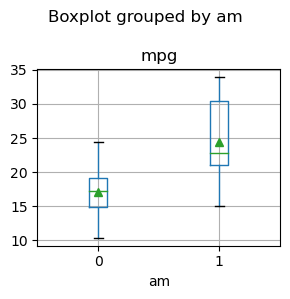

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))
mtcars.boxplot(by='am', column = ['mpg'], showmeans=True, ax = ax, fontsize = 10)
plt.tight_layout()
plt.show()

上図x軸の0,1はそれぞれ列`am`でもつ値を示しています。0の場合はオートマ車、1の場合はマニュアル車です。
y軸はマイル/ガロンで燃費を示します。

この図から、マニュアル車の方がオートマ車よりも１ガロンあたりの走行距離が長く燃費がが全体としては燃費が良いという仮説を立てることができます。

しかし、このような違いは偶然おきた可能性もあります。例えば、たまたま燃費の悪いオートマ車と燃費の良いオートマ車のグループを選んでしまった可能性もあるかもしれません。そこで、この差がたまたま起きたものなのかどうかを確認するために統計的検定を行うことができます。つまり、得られた標本データから母集団においても差があるのかを確認します。

2グループの平均値を単純に比べることもできますが、標本のばらつきを考えると、少なくとも平均値の差のカットオフ値を決める必要があります。平均値の差が小さければ、サンプリングによるランダム性で説明できます。つまり、2グループの差は、2グループの平均値の差がサンプリングによるものだけであった場合に得られる典型的な値と比較する必要があります。

## 例：平均に差があるように感じるのは偶然か？必然か？

ここでは、2つの標本が異なる平均値を持っているかどうかを比較するためにt検定(t-test)を実行します。

この検定はPythonのこの平均値の差は統計的に有意なものなのかを確認しましょう。
Pythonの`SciPi`の関数`ttest_ind`で実行することができます。

In [47]:
auto_mpg = mtcars.loc[mtcars['am']==1, 'mpg'].values
manual_mpg = mtcars.loc[mtcars['am']==0, 'mpg'].values

scipy.stats.ttest_ind(a = auto_mpg, b = manual_mpg, 
                      equal_var = False, alternative = 'two-sided')

Ttest_indResult(statistic=3.767123145144923, pvalue=0.0013736383330710345)

`ttest_inde`では`equal_var = True`がデフォルトで等分散（2グループの分散が等しいとみなせる場合）であることが求められるスチューデントのt検定（Student's T-test）が用いられます。不等分散（2グループの分散が等しいとみなせない場合）の場合は`equal_var = False`として、ウェルチのt検定（Welch t-test）を実行できます。

等分散かどうかはF検定をして確認することができますが、最初からウェルチのt検定をしても良いでしょう。

上の結果の場合、ウェルチのt検定の実行結果としてt test statisticsは3.76でp-valueは0.0013が得られました。このことからたまたまでは起こり得ないことが起きた、つまり2つのグループの間に差はあるということが得られました。

```{note}
一般にt検定は母集団と標本が正規分布に従うことを前提としていますが2つの分布が同じ方向に適度に偏っている場合に正規性からの逸脱を許容できることが示されています。これは、中心極限定理によるもので、標本サイズが十分に大きければ母集団の分布に関わらず標本の平均値は正規分布になるというものです。
```

```{note}
なお、今回のデータでは用いませんが、対応のあるt検定は`scipy.stats.ttest_rel()`で実行できます。
```